# **1. INTRODUCTION**
# Overview
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# Part 1: Decision trees:
* For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
* Try and optimize each of the models, making sure to document how you've set up your hyperparameters.
* Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
* Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

# Part 2: SVM:
* In this section, you may be required to clean the data a little bit so as to make sense of the features.
* Document what transformation you've done on the data.
* Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version.

# 1.1 Defining the Research Question

# a) Specifying the Question

The research question is to use the given variables to build a model to predict whether or not a patient has hypothyroid.

# b) Defining the Metric of Success

This project will be successful when:

1)We Identify the most crucial independent variables that affect Hypothyroidism.

2)The model achieves atleast 80% accuracy

3)Have the lowest RMSE score possible

# c) Understanding the context

The context of this data set is in a medical domain. As a data scientist approached by Nairobi Hospital, my job is to look at the different features provided and use them to determine whether or not a patient has hypothyroid.


Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

Hypothyroidism may not cause noticeable symptoms in the early stages.

Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.

Hence the need for early detection.

Hypothyroidism may be due to a number of factors.

Risk factors Although anyone can develop hypothyroidism, you're at an increased risk if you:

Are a woman

Are older than 60

Have a family history of thyroid disease

Have an autoimmune disease, such as type 1 diabetes or celiac disease

have been treated with radioactive iodine or anti-thyroid medications

Received radiation to your neck or upper chest

Have had thyroid surgery (partial thyroidectomy)

Have been pregnant or delivered a baby within the past six months

# d) Experimental Design

1. Data cleaning & preparation

 a) loading libraries and data set

 b) remove missing values & duplicates

 c) remove and/or rename columns where necessary

 d) change data type where necessary

2. Exploratory Data Analysis

 a) univariate analysis

 b) bivariate analysis

3. Modeling

 a) Decision Trees

     - Carry out feature engineering & selection

     - Split data into train & test sets

     - Use random forest, Ada Boost, and/or Gradient Boost

     - Visualize the decision trees created

     - Optimize the models

     - Select the model you trust most (random forest, ada boosted forest, gradient boosted forest) & identify the most impactful features

 b) Support Vector Machines

     - Clean data & document

     - Apply polynomial, linear, & rbf kernels

     - Evaluate kernel performance & select best-performancing kernel

     - Use tuned hyperparameters on best kernel to make predictions

4. Conclusion

# Dataset
Dataset Files

Source [http://bit.ly/hypothyroid_data]

# Dataset Columns
Age

Sex

on_thyroxine

query_on_thyroxine

on_antithyroid_medicationthyroid_surgery

query_hypothyroid

query_hyperthyroid

pregnant

sick

lithium

goitre

TSH_measured

TSH

T3_measured

TT4_measured

TT4

# e) Appropriateness of the Data

After going through the data set, I can confidently say that it is not appropriate for effectively answering the research question. For starters, it has way more observations of those whose status is negative than those who actually have hypothyroid. It also has way more female patients than males, and most of the patients are within the 40-60 age range. Furthermore, there was a lot of missing data which had to be imputed, meaning that the new and cleaned data set might not have accurately reflected reality. So this data set is very highly biased and not appropriate.

# **2. DATA UNDERSTANDING**

# Importing Libraries

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
## Import Libraries
# Data Manipulation libraries
import pandas as pd
import numpy as np
import math
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns; sns.set(font_scale=1.2); sns.set(rc={'figure.figsize':(10, 8)})
import seaborn as sb

# Modelling library
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#from sklearn.externals.six import StringIO  

from IPython.display import Image  
import pydotplus

# to preview all columns
pd.set_option("display.max.columns", None)

In [4]:
# loading & previewing data set
thyroid = pd.read_csv('hypothyroid.csv')
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
# previewing the last observations of the dataset
# 
thyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
# checking on the shape of the dataset
print('Number of record in thyroid dataset: ' + str(thyroid.shape[0]))

Number of record in thyroid dataset: 3163


In [7]:
# previewing basic info
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

Our data set has 3,163 rows and 26 columns. On closer inspection, we see that all our columns are categorical in nature. This lack of variability in data types is suspicious especially when we can see from the data set's preview that variables like 'age', 'T3', 'TSH', and so on should be numerical.

In [8]:
# data description 
# 
thyroid.describe().T


,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


The unique values report represents the cardinality of the features. The following columns TSH, TT4, T4U and FTI have a large number of unique values hence high cardinality. In comparison to the number of columns we will ignore the cardinality as the cardinality in relation to the number of columns is low meaning the columns provide a variation of values hence we can gain information from these columns

The report represents the value of the mode of each feature while the frequency report gives the number of times this values occurs.

We notice the presence of question marks(?) across a number of columns(namely : age, T3, TT4, T4U, FTI, TBG) to represent missing values in the dataset

# **3. DATA CLEANING**

In [9]:
# obtaining the datatype for each column

thyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [10]:
# convert the dataset into categorical data
thyroid.astype('category').head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [11]:
# changing numeric columns to numeric data types
thyroid[['age','TSH','T3','TT4','T4U','FTI']] = thyroid[['age','TSH','T3','TT4','T4U','FTI']].apply(pd.to_numeric, errors='coerce')

In [12]:
thyroid.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

In [13]:
# changing sex column to lower case 
thyroid['sex'] = thyroid['sex'].str.lower()

# Checking for Duplicates

In [14]:
# checking for any duplicates
thyroid.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
3158    False
3159    False
3160    False
3161    False
3162    False
Length: 3163, dtype: bool

In [15]:
thyroid.duplicated().sum()

77

From the output, there are 77 duplicates

In [16]:
# Select duplicate rows except first occurrence based on all columns
duplicateRows = thyroid[thyroid.duplicated()]
 
print("Duplicated Rows except first occurrence based on all columns are :")
print(duplicateRows)

Duplicated Rows except first occurrence based on all columns are :
           status   age sex on_thyroxine query_on_thyroxine  \
53    hypothyroid  69.0   f            f                  f   
66    hypothyroid  62.0   m            f                  f   
124   hypothyroid  77.0   f            f                  f   
128   hypothyroid  79.0   f            f                  f   
131   hypothyroid  50.0   f            t                  f   
...           ...   ...  ..          ...                ...   
3048     negative  28.0   m            f                  f   
3055     negative  33.0   f            f                  f   
3066     negative  74.0   f            t                  f   
3111     negative  89.0   m            f                  f   
3151     negative  58.0   f            f                  f   

     on_antithyroid_medication thyroid_surgery query_hypothyroid  \
53                           f               f                 f   
66                           f          

In [17]:
# dropping duplicates, if any
thyroid = thyroid.drop_duplicates()
thyroid.shape

(3086, 26)

After carrying out the function to drop duplicates, we are now left with 3,086 records, which is not a concerning amount of data loss

# Checking for cardinality

In [18]:
# Check Cardinality
#
# We will use a for loop to iterate through the columns 
# while checking for the number of unique values in each column.

# Number of unique values in the hypothyroidsm dataset
print('Cardinality of the dataset columns:\n')
for i in thyroid.columns:
  print(f'{i:<23} : {thyroid[i].nunique()}')

Cardinality of the dataset columns:

status                  : 2
age                     : 92
sex                     : 3
on_thyroxine            : 2
query_on_thyroxine      : 2
on_antithyroid_medication : 2
thyroid_surgery         : 2
query_hypothyroid       : 2
query_hyperthyroid      : 2
pregnant                : 2
sick                    : 2
tumor                   : 2
lithium                 : 2
goitre                  : 2
TSH_measured            : 2
TSH                     : 239
T3_measured             : 2
T3                      : 69
TT4_measured            : 2
TT4                     : 268
T4U_measured            : 2
T4U                     : 158
FTI_measured            : 2
FTI                     : 280
TBG_measured            : 2
TBG                     : 53


The following columns TSH, TT4, T4U and FTI have a large number of unique values hence high cardinality. In comparison to the number of columns we will ignore the cardinality as the cardinality in relation to the number of columns is low.

In [19]:
# Checking for the exact unique values in the dataset
# We will use a for loop to iterate through the different columns
#
for i in thyroid.columns:
  
  print(i)
  print(thyroid[i].unique(),'\n')

status
['hypothyroid' 'negative'] 

age
[72. 15. 24. 77. 85. 64. 20. 42. 69. 75. 53. 59. 68. 50. 78. 65. 28. 43.
 40. 84. nan 83. 63. 73. 36. 27. 48. 71. 60. 34. 79. 62. 74. 32. 41. 70.
 29.  5. 58. 35. 51. 22. 16. 44. 39. 47. 18. 17. 88. 56. 30. 45. 66. 52.
 54. 80. 33. 38. 92. 67. 46. 13. 89. 61. 49. 26. 57. 31. 90. 81. 25. 37.
 76. 87. 23. 55. 86. 98. 21. 97.  1.  6. 14. 82. 11. 19.  9. 12. 10.  8.
  7.  4. 93.] 

sex
['m' 'f' '?'] 

on_thyroxine
['f' 't'] 

query_on_thyroxine
['f' 't'] 

on_antithyroid_medication
['f' 't'] 

thyroid_surgery
['f' 't'] 

query_hypothyroid
['f' 't'] 

query_hyperthyroid
['f' 't'] 

pregnant
['f' 't'] 

sick
['f' 't'] 

tumor
['f' 't'] 

lithium
['f' 't'] 

goitre
['f' 't'] 

TSH_measured
['y' 'n'] 

TSH
[3.00e+01 1.45e+02 0.00e+00 4.30e+02 7.30e+00 1.38e+02 7.70e+00 2.10e+01
 9.20e+01 4.80e+01 3.60e+01 1.50e+01 1.53e+01 2.50e+01 6.10e+01 2.80e+01
 1.70e+02 5.40e+01 2.16e+02 5.60e+01 7.10e+01 4.60e+01 7.00e+01 3.40e+01
 5.30e+01 9.40e+00 1.26e+02 1.00e

From the results, we observe that there are some ? in the dataset indicating presence of missing data across the dataset

# Checking for Missing values

In [20]:
# Check for missing data on all columns
thyroid.isnull().sum()


status                         0
age                          438
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          455
T3_measured                    0
T3                           680
TT4_measured                   0
TT4                          240
T4U_measured                   0
T4U                          239
FTI_measured                   0
FTI                          238
TBG_measured                   0
TBG                            0
dtype: int64

Now we have a clear observation of the missing values present in the data

We will keep the null values in place for now and explore the data.

We will also model the trees with the missing values in place for now because regression and classification trees algorithms can use missing values as unique and different values when building the predictive model.

As for the SVM modeling, we will first deal with the missing values before proceeding to build the predictive models.

In [21]:
# replacing the question marks within the dataset
thyroid= thyroid.replace(['?'],np.nan)
thyroid.take(np.random.permutation(len(thyroid))[:15])

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
1558,negative,62.0,f,f,f,f,f,f,f,f,t,f,f,f,y,11.0,y,0.8,y,73.0,y,0.74,y,98.0,n,NaN
2934,negative,32.0,f,f,f,f,f,f,f,f,f,f,f,f,y,0.9,y,2.3,y,97.0,y,1.02,y,96.0,n,NaN
1773,negative,64.0,f,t,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.2,y,129.0,y,1.03,y,125.0,n,NaN
270,negative,18.0,f,t,f,f,f,t,f,f,f,f,f,f,y,3.3,y,4.3,y,247.0,y,1.65,y,149.0,n,NaN
2085,negative,11.0,m,f,f,f,f,f,f,f,f,f,f,f,y,2.2,y,2.9,y,120.0,y,1.01,y,119.0,n,NaN
1892,negative,79.0,f,f,f,f,f,f,f,f,t,f,f,f,y,1.3,y,0.9,y,102.0,y,0.95,y,107.0,n,NaN
2583,negative,63.0,m,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.6,y,73.0,y,0.85,y,86.0,n,NaN
552,negative,25.0,f,t,f,f,f,f,f,f,f,f,f,f,y,4.2,n,NaN,y,93.0,y,0.88,y,106.0,n,NaN
2991,negative,NaN,m,f,f,f,f,f,f,f,f,f,f,f,y,7.9,y,2.9,y,116.0,y,1.02,y,114.0,n,NaN
991,negative,40.0,f,f,t,f,t,t,f,f,f,f,f,f,y,0.0,y,2.0,y,153.0,y,0.96,y,159.0,n,NaN


Because we have already dealt with the first set of null values and we dont know why there were question marks in the dataset, we will replace them with most appearing (mode)

In [22]:
# filling the newly formed NaNs with mode
for column in thyroid.columns:
    thyroid[column].fillna(thyroid[column].mode()[0],inplace=True)
    
thyroid.take(np.random.permutation(len(thyroid))[:15])    

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
2716,negative,74.0,m,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.9,y,88.0,y,0.81,y,109.0,n,21
553,negative,66.0,f,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.6,y,124.0,y,0.92,y,135.0,n,21
2820,negative,50.0,m,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,2.1,y,90.0,y,0.72,y,126.0,n,21
1133,negative,57.0,m,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.9,y,121.0,y,0.97,y,126.0,n,21
563,negative,75.0,f,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,2.4,y,177.0,y,1.14,y,155.0,n,21
903,negative,34.0,m,f,f,f,f,f,f,f,f,f,f,f,y,1.4,y,1.9,y,83.0,y,0.69,y,120.0,n,21
1081,negative,16.0,m,f,f,f,f,f,f,f,f,f,f,f,y,0.0,n,1.6,y,128.0,y,1.06,y,121.0,n,21
2778,negative,52.0,m,f,f,f,f,f,f,f,f,f,f,f,y,1.1,y,2.7,y,159.0,y,1.19,y,134.0,n,21
1996,negative,63.0,f,f,t,f,f,f,f,f,f,f,f,f,y,0.0,y,0.9,y,110.0,y,0.82,y,134.0,n,21
571,negative,63.0,m,f,t,f,f,f,f,f,f,f,f,f,y,0.0,y,2.1,y,99.0,y,0.92,y,107.0,n,21


# Checking and Dealing with Outliers

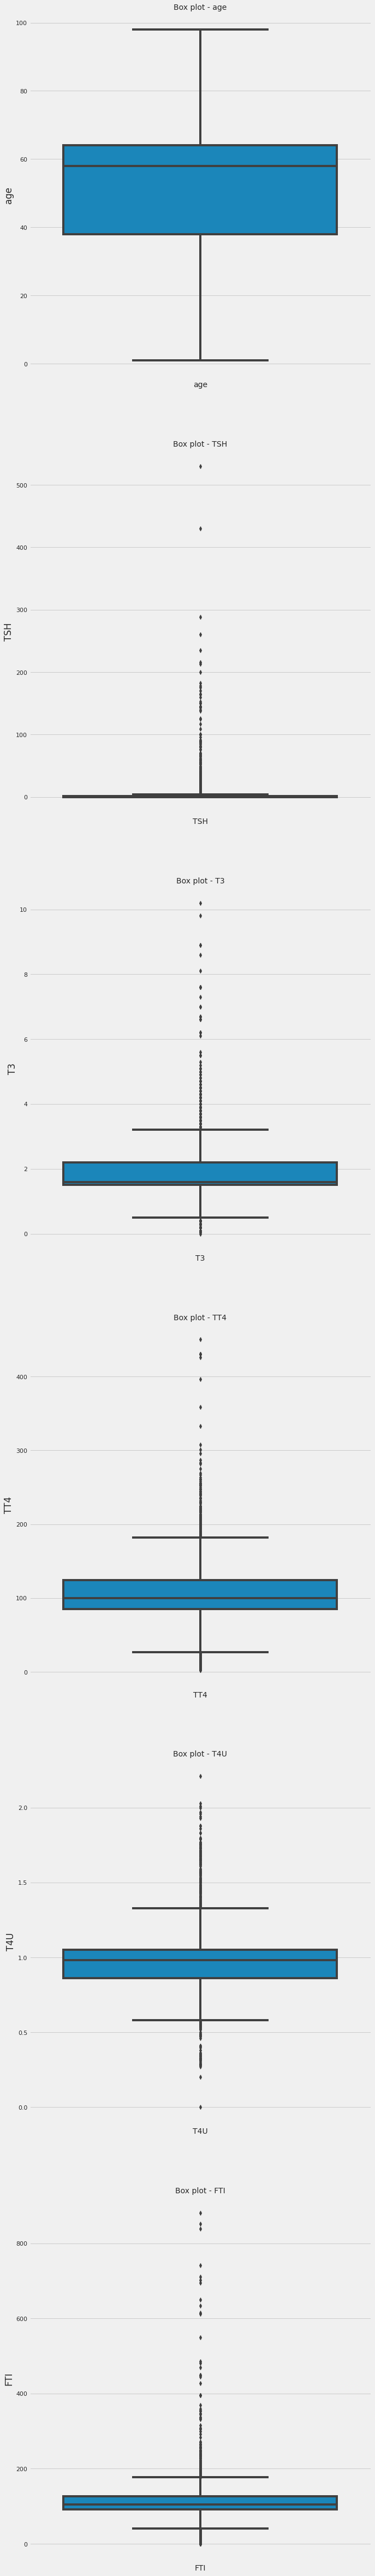

In [23]:
# The plotting is for non binary columns
def plot_boxplots(target_dataframe,col_names):
    
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=14)
        ax[i].set_xlabel(column_name, fontsize=14)
    
    plt.show()
    
    #Execute the function
outlier_columns =['age','TSH','T3','TT4','T4U','FTI']
plt.style.use('fivethirtyeight')
plot_boxplots(thyroid,outlier_columns)

Outliers have been noted in all the hormonal mesurements columns. i.e, TSH, T3, TT4, T4U and FTI. OUtliers will not be dropped as futther reaserch is needed to asertain whether the measurements were incorrect pr whether it was a calibration error.

# **4. EXPLORATORY DATA ANALYSIS**

In [24]:
# get summary statistics
thyroid.describe(include = 'all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3086,3086.000000,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086.000000,3086,3086
unique,2,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,52
top,negative,NaN,f,f,f,f,f,f,f,f,f,f,f,f,y,NaN,y,NaN,y,NaN,y,NaN,y,NaN,n,21
freq,2945,NaN,2192,2640,3031,3044,2983,2851,2851,3025,2989,3046,3084,2990,2631,NaN,2406,NaN,2846,NaN,2847,NaN,2848,NaN,2835,2848
mean,NaN,52.232016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.952793,NaN,1.860143,NaN,107.874238,NaN,0.977748,NaN,114.140279,NaN,NaN
std,NaN,18.065430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.276447,NaN,0.875818,NaN,42.932366,NaN,0.216874,NaN,57.969106,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,2.000000,NaN,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.500000,NaN,85.000000,NaN,0.860000,NaN,92.000000,NaN,NaN
50%,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,NaN,1.600000,NaN,100.000000,NaN,0.980000,NaN,105.000000,NaN,NaN
75%,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000,NaN,2.200000,NaN,124.000000,NaN,1.050000,NaN,126.000000,NaN,NaN


# 1. Univariate Analysis

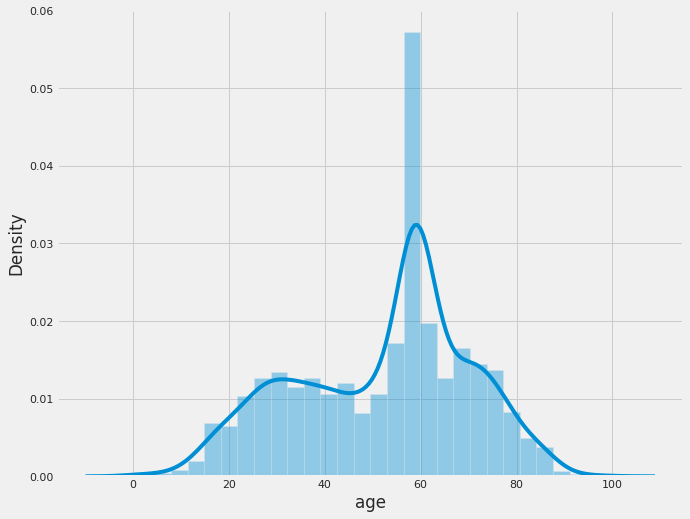

In [25]:
# looking at distribution of age 
sb.distplot(thyroid.age)

The 'age' variable appears to be a normal distribution, peaking at arounf 50-52.

In [26]:
print("Mean age:", thyroid.age.mean())
print("Median age:", thyroid.age.median())
print("Modal age:", thyroid.age.mode())

Mean age: 52.23201555411536
Median age: 58.0
Modal age: 0    59.0
dtype: float64


The mean, median, and mode are all the same (51). This is unusual but understandable because we have imputed the null values with the mean age.

We observe that most people tested negative for hypothyrodism

In [27]:
# calculating age range
min_age = thyroid.age.min()
max_age = thyroid.age.max()
range_age = max_age - min_age
print("The youngest age is {}, the oldest age is {}.".format(min_age, max_age))
print("Therefore there's a range of {}".format(range_age))

The youngest age is 1.0, the oldest age is 98.0.
Therefore there's a range of 97.0


In [28]:
# splitting age into 9 age groups using the following ranges:
# 0-9, 10-18, 19-27, 28-36, 37-54, 55-63, 64-72, 73-81 and 82-99

conditions = [
    ((thyroid.age >= 0) & (thyroid.age <= 9)),
    ((thyroid.age >= 10) & (thyroid.age <= 18)),
    ((thyroid.age >= 19) & (thyroid.age <= 27)),
    ((thyroid.age >= 28) & (thyroid.age <= 36)),
    ((thyroid.age >= 37) & (thyroid.age <= 54)),
    ((thyroid.age >= 55) & (thyroid.age <= 63)),
    ((thyroid.age >= 64) & (thyroid.age <= 72)),
    ((thyroid.age >= 73) & (thyroid.age <= 81)),
    ((thyroid.age >= 82) & (thyroid.age <= 99))
]
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

thyroid['age_range'] = np.select(conditions, choices)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f25fe75cfd0>],
      dtype=object)

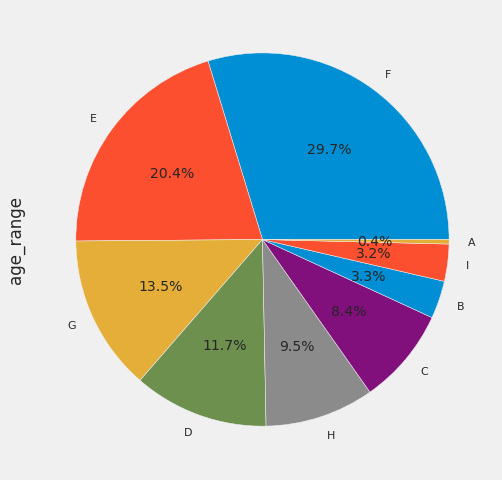

In [29]:
# plotting the age ranges in a pie chart
thyroid.age_range.value_counts().plot(kind = 'pie', autopct = '%0.1f%%',
                                       figsize = [10, 8], subplots = True)

We can see that majority of the respondents are in Group E, which is between 37 and 54. The age range with the fewest patients is Group A (0-9 years).

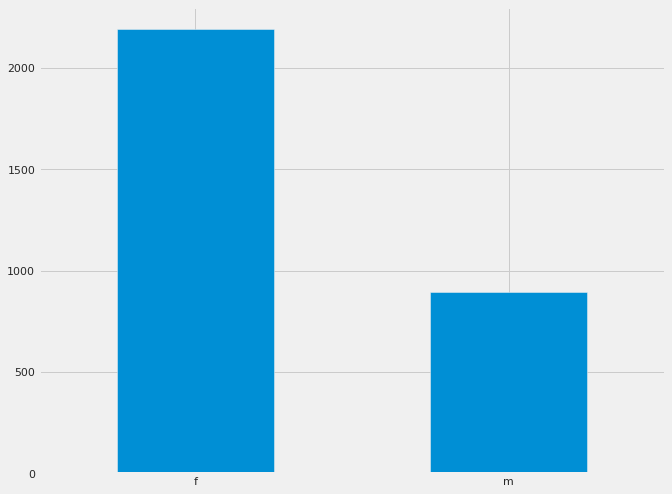

In [30]:
# previewing our data set's gender distribution
thyroid.sex.value_counts().plot(kind = 'bar', rot = 0)

Our data set is very biased because we can see that females outnumber males by more than twice.

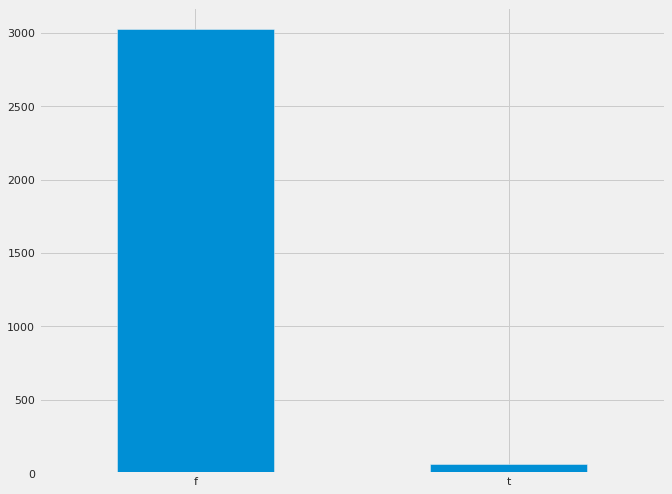

In [31]:
# distribution of pregnancy
thyroid.pregnant.value_counts().plot(kind = 'bar', rot = 0)

Majority of the respondents are not pregnant. Very few are, which makes it hard to accurately investigate whether there is a link between pregnancy and hypothyroidism. Also, we have to confirm that those marked pregnant are not male, otherwise that would be a wrong/invalid record.

In [32]:
thyroid.groupby('pregnant').sex.value_counts()

pregnant  sex
f         f      2131
          m       894
t         f        61
Name: sex, dtype: int64

As expected, there are no pregnant males which makes valid sense. Of the 2,131 females remaining in the data set, only 61 are pregnant, which is not sufficient to explore the relationship between pregnancy and hypothyroidism, if such a relationship exists.

In [33]:
# creating lists containing the column names stored in their respective lists
# to make iterating through the data set easier
tests_measured = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 
                  'FTI_measured', 'TBG_measured']

categorical = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
               'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid']

others = ['pregnant', 'sick', 'tumor', 'lithium', 'goitre']

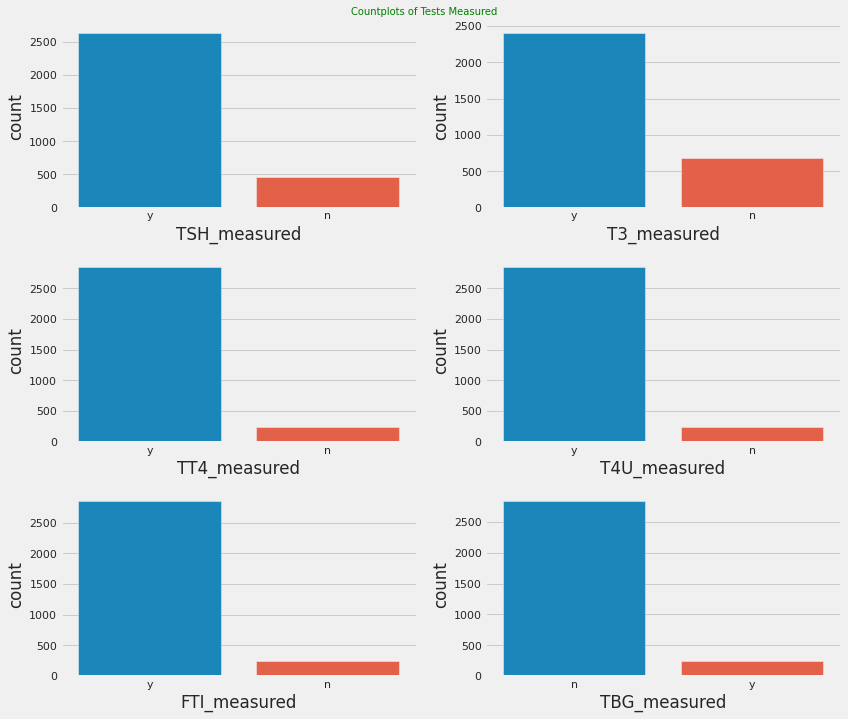

In [34]:
# plotting the distribution of the tests taken
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
plt.suptitle('Countplots of Tests Measured', fontsize = 10, y = 1.0, 
             color = 'green')

for ax, data, column in zip(axes.flatten(), thyroid, tests_measured):
    sb.countplot(thyroid[column], ax = ax)
    
plt.tight_layout()

TSH, T3, TT4, T4U, and FTI show more 'yes' results than 'no' results to their respective tests. The test for TBG is the opposite which means that there might be something unusual about that test.

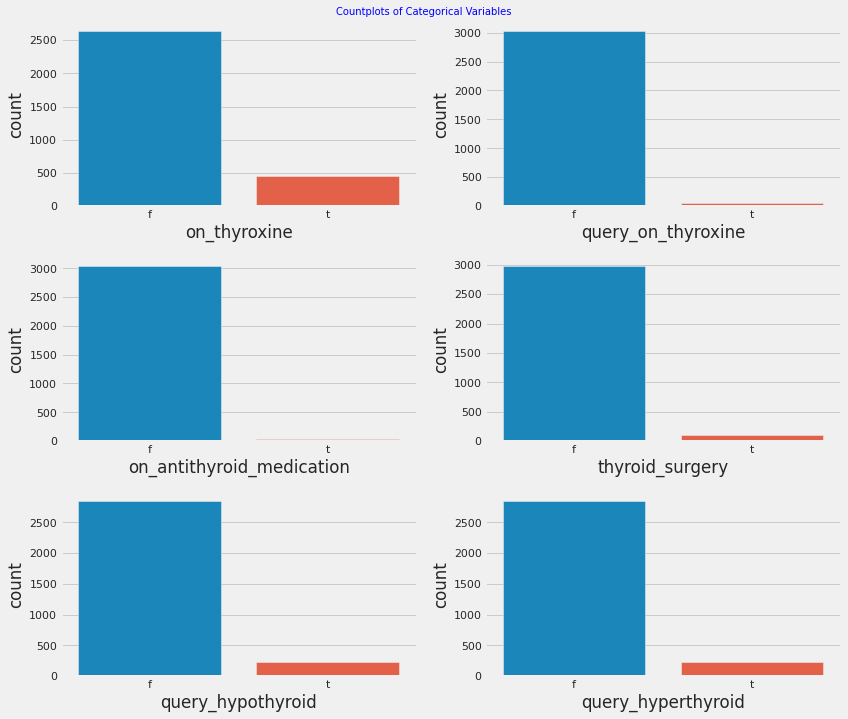

In [35]:
# plotting the distribution of medication & surgery
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
plt.suptitle('Countplots of Categorical Variables', fontsize = 10, y = 1.0,
             color = 'blue')

for ax, data, column in zip(axes.flatten(), thyroid, categorical):
    sb.countplot(thyroid[column], ax = ax)
    
plt.tight_layout()

We see that majority of the patients haven't gone for medication or surgery related to hypothyroidism so this goes on to further prove the inapporpriatenness of this data set in answering the research question.

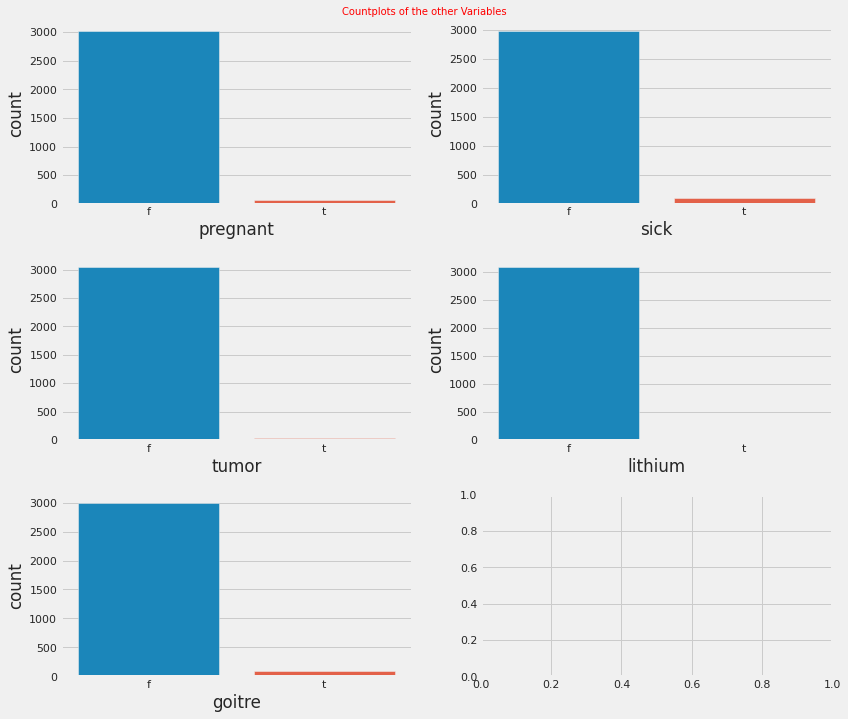

In [36]:
# plotting the distribution of the rest of the variables
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
plt.suptitle('Countplots of the other Variables', fontsize = 10, y = 1.0,
             color = 'red')

for ax, data, column in zip(axes.flatten(), thyroid, others):
    sb.countplot(thyroid[column], ax = ax)
    
plt.tight_layout()

We can see that majority aren't pregnant or sick, and they don't have tumors, lithium, or goitres. As with the other variables, this data is biased and not appropriate enough to make an accurate and realistic analysis/prediction.

# 2. Bivariate Analysis

The aim of bivariate analysis is to determine if a relationship exists between the given features of our data especially the between the dependent and independent variable

negative       2945
hypothyroid     141
Name: status, dtype: int64


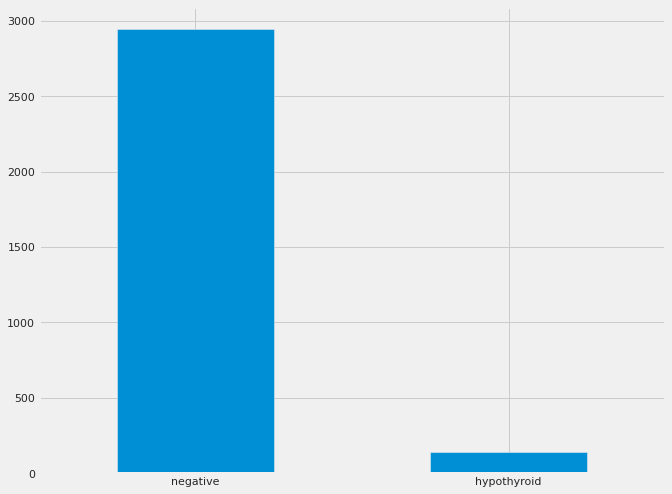

In [37]:
# distribution of hypothyroidism status
thyroid.status.value_counts().plot(kind = 'bar', rot = 0)
print(thyroid.status.value_counts())

It appears that most of the observations have reported 'negative'. Those without hypothyroidism outnumber those with it 2945 to 141 which makes this dataset very biased and also not appropriate enough to effectively and realistically answer the research question.

[Text(0, 0.5, 'Status'), Text(0.5, 1.0, 'Hypothyroidism per Age Range')]

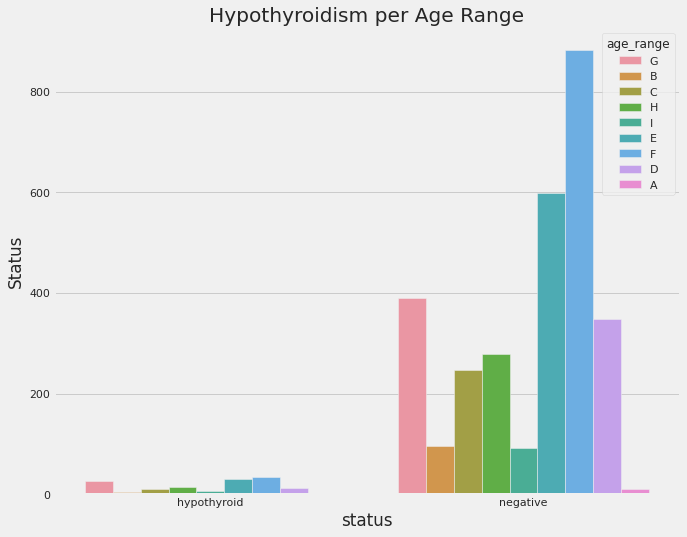

In [38]:
# previewing the distribution of hypothyroidism across the age ranges
thyroid_age = sb.countplot('status', hue = 'age_range', data = thyroid)
thyroid_age.set(title = "Hypothyroidism per Age Range", ylabel = "Status")

We can see that the records for those with hypothyroid are very, very low compared to those who are negative. In both cases, Group E (ages 37-54) made up the vast majority while group A (0-9 years) made up the minority.

In [39]:
# hypothyroidism per pregnancy status
thyroid.groupby('status').pregnant.value_counts()

status       pregnant
hypothyroid  f            140
             t              1
negative     f           2885
             t             60
Name: pregnant, dtype: int64

Of the 61 pregnant women in our dataset, only 1 had hypothyroidism. Not only is this not generalizable, it is also too biased in determining whether pregnancy is a factor influencing hypothyroidism.

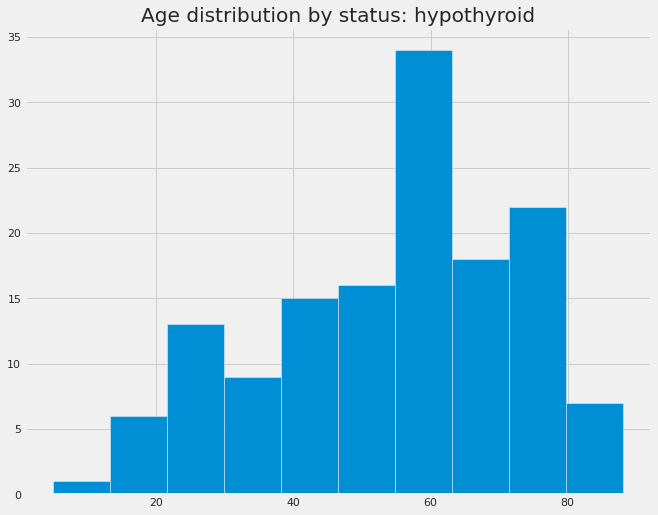

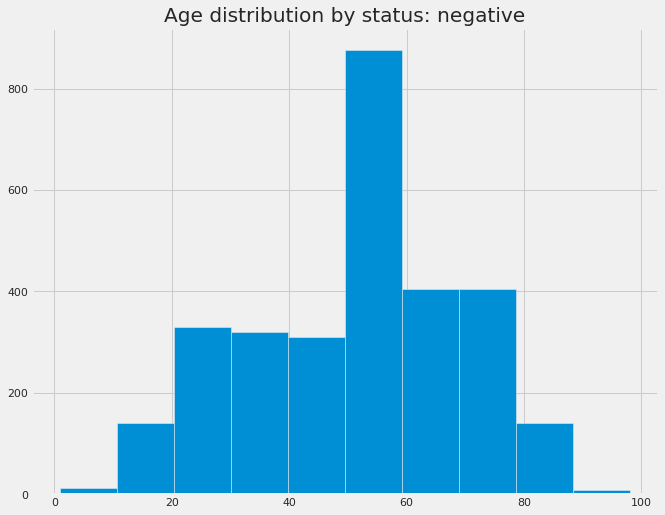

In [40]:
# status distribution across age
status = list(thyroid.status.unique())
for stat in status:
    thyroid.loc[thyroid.status == stat].age.hist()
    plt.title("Age distribution by status: {}".format(stat))
    plt.show()

Both appear to have normap distributions and their most frequently occuring values seem to be somewhere between 45 and 58.

In [41]:
# display the distribution of these based on status

thyroid_cat = tests_measured + categorical + others

for cat in thyroid_cat:
    print(thyroid.groupby('status')[cat].value_counts())
    print("\n")

status       TSH_measured
hypothyroid  y                140
             n                  1
negative     y               2491
             n                454
Name: TSH_measured, dtype: int64


status       T3_measured
hypothyroid  y               128
             n                13
negative     y              2278
             n               667
Name: T3_measured, dtype: int64


status       TT4_measured
hypothyroid  y                141
negative     y               2705
             n                240
Name: TT4_measured, dtype: int64


status       T4U_measured
hypothyroid  y                141
negative     y               2706
             n                239
Name: T4U_measured, dtype: int64


status       FTI_measured
hypothyroid  y                141
negative     y               2707
             n                238
Name: FTI_measured, dtype: int64


status       TBG_measured
hypothyroid  n                138
             y                  3
negative     n               

From the output;

* most of the patients are female
* most of the patients' status is negative
* majority of the respondents are between 37-54 years of age
* most of the patients had carried out the necessary tests, e.g. TSH, T3, TT4, T4U, FTI, and TBG
* majority are on thyroxine
* majority reported false on query on thyroxine
* majority are not on antithyroid medication
* majority did not have thyroid surgery
* majority did not query on both hyperthyroid and hypothyroid
* majority are not pregnant or sick
* majority don't have tumors, lithium, or goitre

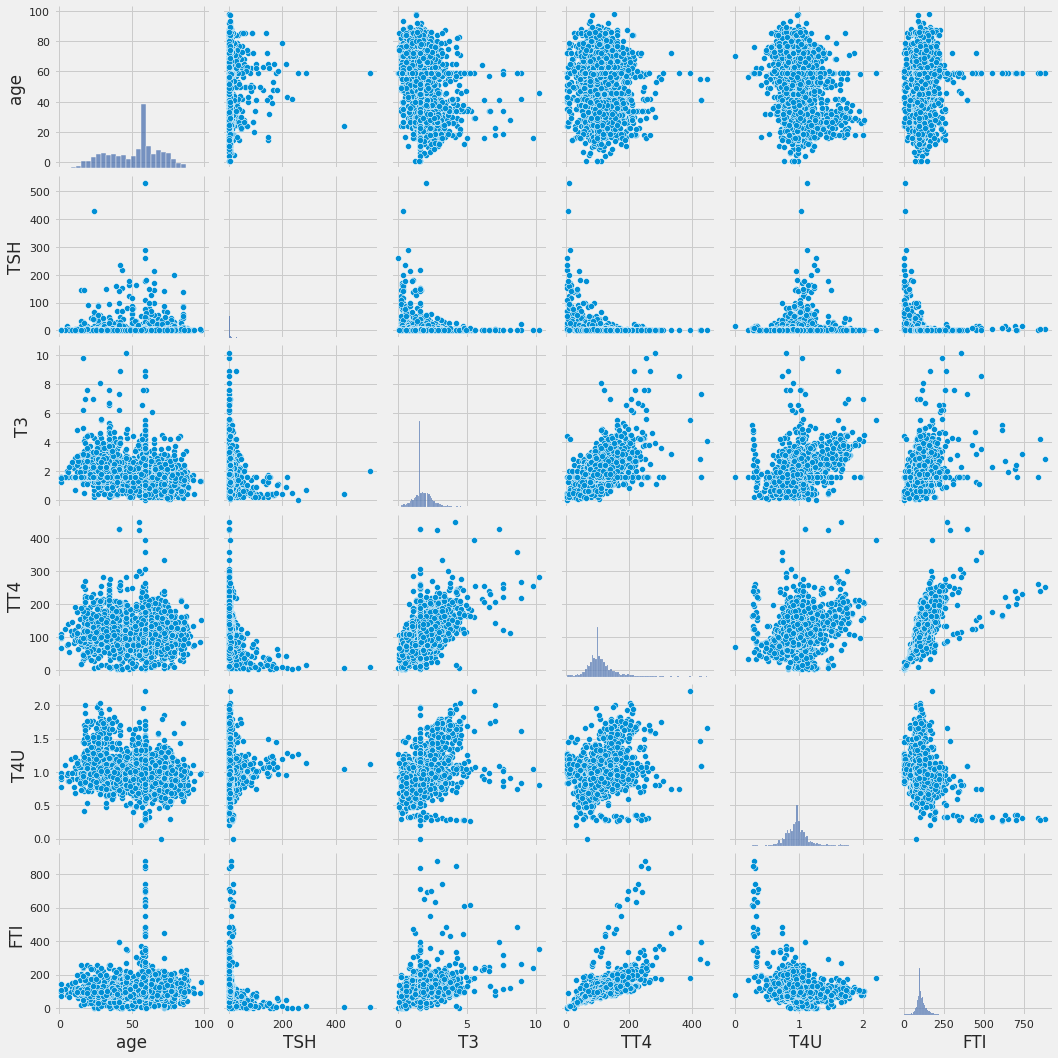

In [42]:
# Use of a pairplot to check for correlation between variables.
sb.pairplot(thyroid, kind = 'scatter', dropna = False)
plt.tight_layout
plt.show()



Hyperthyroidism shows up more in TSH tests, indicating that that test is an important factor influencing it. We also see that linear models will not work well with this data so we can only use them for comparison purposes.

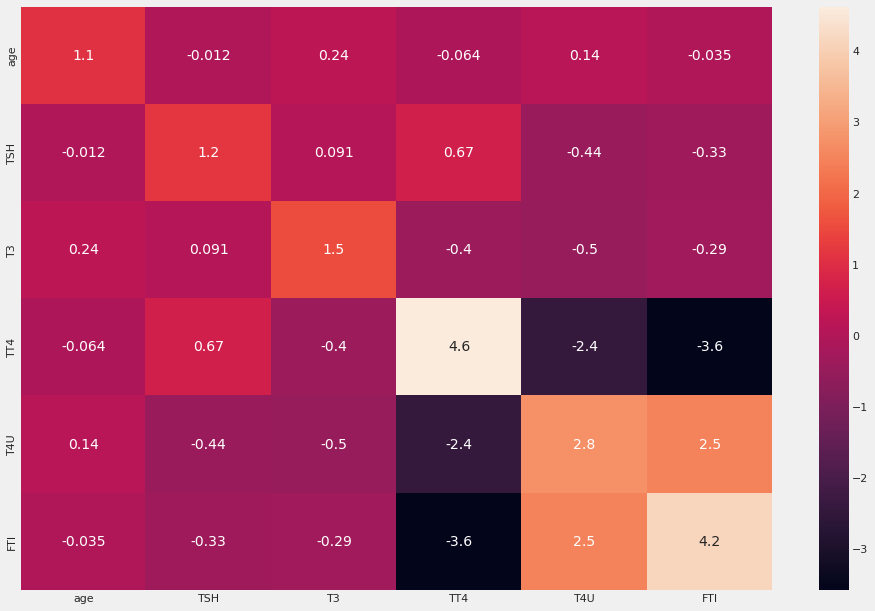

In [43]:
# investigating the correlation between variables
corr = thyroid.corr()
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (15, 10))
sb.heatmap(vif, annot = True)

A Variance Inflation Factor (VIF) score of around 5 is problematic. While we don't have any such scores, we do however have two variables, TT4 and FTI that come close. We will drop them and their relevant tests, i.e. TT4_measured and FTI_measured respectively, and see if this data set's multicollinearity will be reduced.

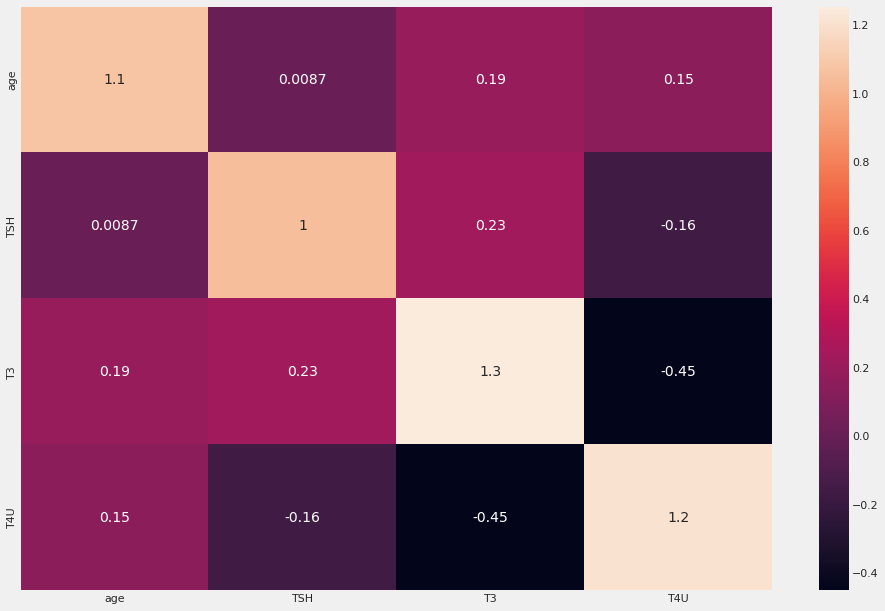

In [44]:
thyroid = thyroid.drop(columns = ['TT4_measured', 'TT4', 'FTI_measured', 'FTI'], axis = 1)

corr = thyroid.corr()
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, 
                   columns = corr.columns)

plt.figure(figsize = (15, 10))
sb.heatmap(vif, annot = True)

This is better. We see that the VIF of T4U has decreased significantly from 2.8 to 1.2. This shows that it had some amount of collinearity with one of the variables that we have dropped.

In [45]:
# dropping columns that are no longer relevant
thyroid = thyroid.drop(columns = ['TSH_measured', 'T3_measured', 'T4U_measured',
                           'TBG_measured', 'age'], axis = 1)

In [46]:
# saving to csv to use as a checkpoint
thyroid.to_csv('thyroid_clean.csv', index = False)

# to reload from this checkpoint, uncomment the below line of code
#thyroid = pd.read_csv('thyroid_clean.csv')

# **5. MODELING**

# Feature Engineering and Selection

In [47]:
# previewing our data so we can determine which variables to encode
thyroid.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,T4U,TBG,age_range
0,hypothyroid,m,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,1.48,21,G
1,hypothyroid,f,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,1.13,21,B
2,hypothyroid,m,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,1.00,21,C
3,hypothyroid,f,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,1.04,21,C
4,hypothyroid,m,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,1.28,21,H


In [48]:
encode = thyroid.columns.to_list()
encode.remove('TSH')
encode.remove('T3')
encode.remove('T4U')
encode.remove('TBG')
encode

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'age_range']

In [49]:
# encoding
from sklearn.preprocessing import LabelEncoder


# dictionary to store each unique variable class
class_dict = {}

for item in encode:
    encoder = LabelEncoder().fit(thyroid[item].unique())
    classed = encoder.classes_
    class_dict[item] = classed
    thyroid[item] = encoder.transform(thyroid[item].values)

# to decode, use the following structure
class_dict['age_range'][6]

'G'

We have successfully encoded our categorical variables and are now ready to do the actual modelling. While I intend to use all the variables that are now remaining, should I be required to select only a few, these are the variables that I think are most important:

* age (age_range now)
* sex
* TSH

# Decision Trees

Random Forest

In [50]:
# splitting our data into features & labels
X = thyroid.drop(columns = ['status']).values
y = thyroid.status.values

# getting our feature names
features = thyroid.columns.to_list()
features.remove('status')

print(X.shape)
print(y.shape)

(3086, 17)
(3086,)


In [51]:
# splitting into training & test data
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

In [52]:
# importing the random forest regressor
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 200, min_samples_split = 20,
                              max_depth = 5)

# fitting our model to our training data
forest.fit(X_train, y_train)

# make predictions using our forest
y_pred = forest.predict(X_test)

In [53]:
# compare actual values with predicted values
compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : y_pred.flatten()})

# previewing our summary statistics
compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.951734
std,0.197179,0.169581
min,0.000000,0.029255
25%,1.000000,0.999151
50%,1.000000,0.999838
75%,1.000000,0.999838
max,1.000000,0.999838


Our model seems to have done a good job at making the predictions as seen by how close the summary statistics of the predicted values are to the those of the actual values. Let us properly and accurately assess the accuracy of the model using the sklearn metrics.

In [54]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03327731641995622
Mean Squared Error: 0.016052152805662
Root Mean Squared Error: 0.12669709075453153


The MSE and RMSE values of our random forest are very small meaning our model has done a really good job.

We now want to see what tree number 24 looks like.

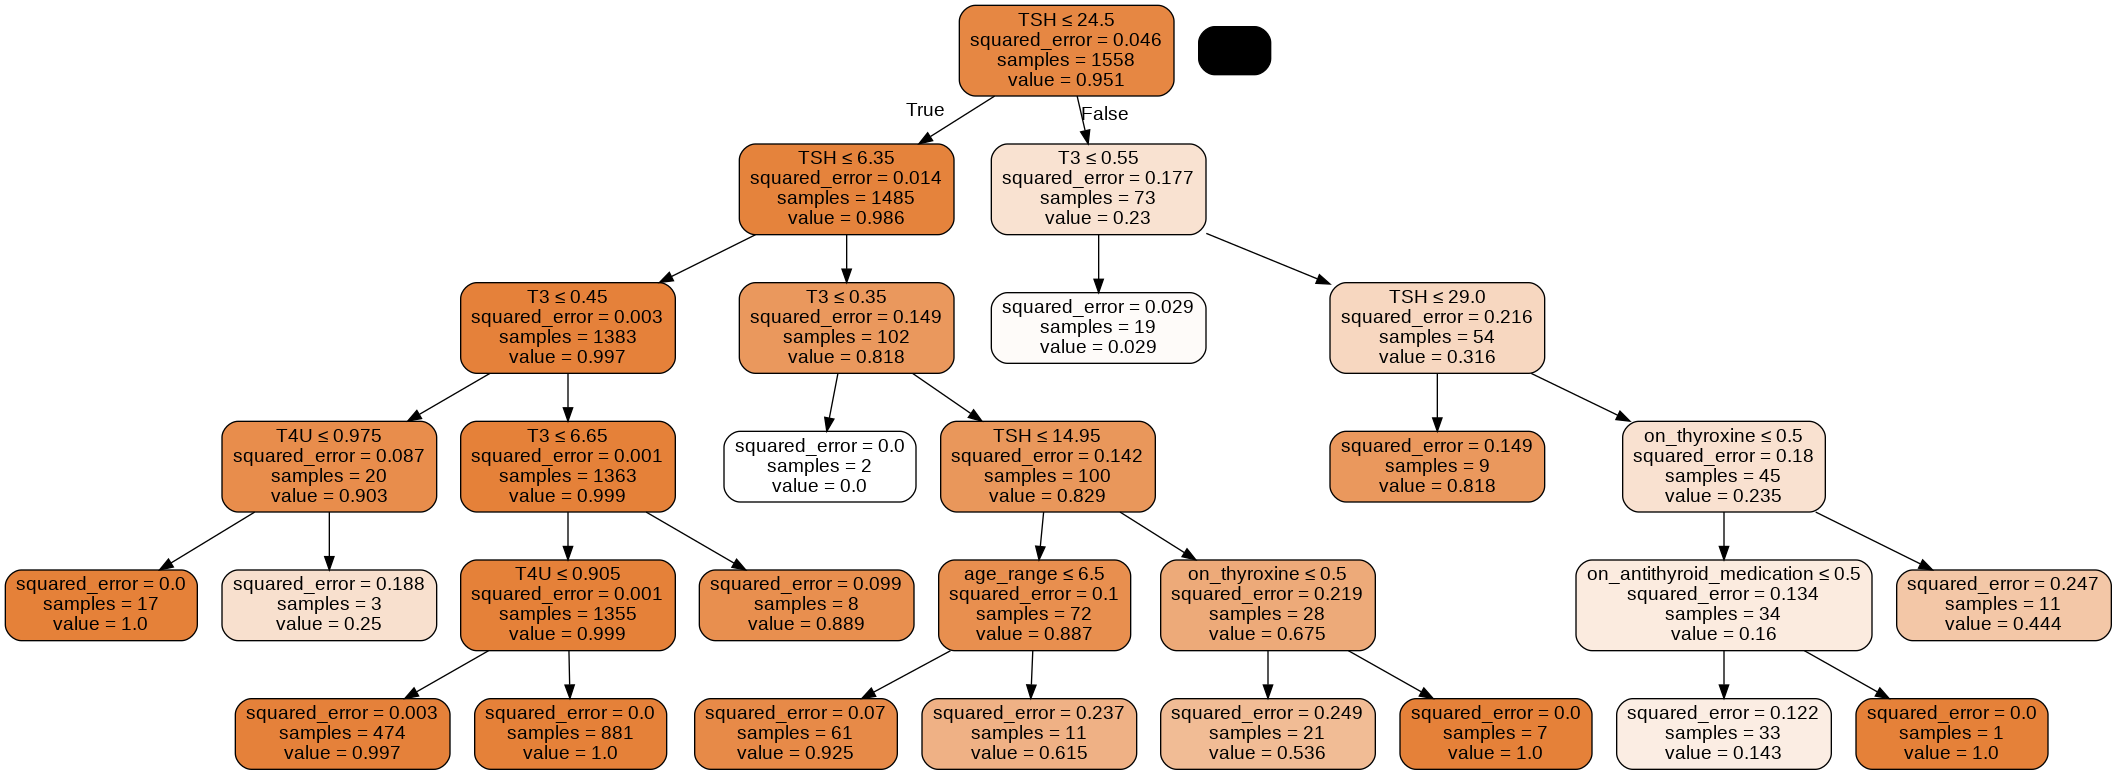

In [55]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

# picks a specific tree from the forest
tree = forest.estimators_[23]

export_graphviz(tree, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [56]:
# now to get the importance levels of our features
importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]

# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances

[('TSH', 0.87),
 ('T3', 0.05),
 ('on_thyroxine', 0.04),
 ('T4U', 0.02),
 ('on_antithyroid_medication', 0.01),
 ('age_range', 0.01),
 ('sex', 0.0),
 ('query_on_thyroxine', 0.0),
 ('thyroid_surgery', 0.0),
 ('query_hypothyroid', 0.0),
 ('query_hyperthyroid', 0.0),
 ('pregnant', 0.0),
 ('sick', 0.0),
 ('tumor', 0.0),
 ('lithium', 0.0),
 ('goitre', 0.0),
 ('TBG', 0.0)]

As we can see, TSH was the most influential variable on a person's hypothyroid status. It is followed by T3, on_antithyroid_medication, age_range, on_thyroine, and goitre although these subsequent variables have very little impact. It is worth noting that these feature importance levels change with the tree used so just because a certain tree got a specific variable as its most impactful feature does not necessarily mean that the same holds true for all trees in the forest.

Ada Boosting

In [57]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth = 5)

# training our model on our training data
decision_tree = decision_tree.fit(X_train, y_train)

# making predictions on the test data
decision_y_pred = decision_tree.predict(X_test)

# comparing actual values to predicted values
decision_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : decision_y_pred.flatten()})

# previewing our summary statistics
decision_compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.950219
std,0.197179,0.190872
min,0.000000,0.000000
25%,1.000000,0.998665
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [58]:
from sklearn.ensemble import AdaBoostRegressor

# creating our classifier with 200 trees of depth 1
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 1), 
                            n_estimators = 200)

# fitting our model to our training data
ada_reg.fit(X_train, y_train)

# making predictions
ada_reg_y_pred = ada_reg.predict(X_test)

# comparing actual values to predicted values
ada_reg_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : ada_reg_y_pred.flatten()})

# previewing our summary statistics
ada_reg_compare.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.952508
std,0.197179,0.154631
min,0.000000,0.256198
25%,1.000000,0.986792
50%,1.000000,0.986792
75%,1.000000,0.986792
max,1.000000,0.986792


In [59]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ada_reg_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ada_reg_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ada_reg_y_pred)))

Mean Absolute Error: 0.04195308042212564
Mean Squared Error: 0.02058864126327186
Root Mean Squared Error: 0.14348742545349352


While our scores using this model are low and good, we can see that the RMSE of our Ada-boosted model is slightly larger than that of our random forest. This means that the random forest model is preferential to the Ada-boosted model.

Gradient Boosting

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

# setting different learning rates, so that we can compare the performance of 
# the classifier's performance at different learning rates
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    grad = GradientBoostingRegressor(n_estimators = 200, max_depth = 2,
                                     learning_rate = learning_rate,
                                     random_state = 0)
    grad.fit(X_train, y_train)

    print("Learning rate:", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(grad.score(X_train,
                                                                   y_train)))
    print("Accuracy score (validation): {0:.3f}".format(grad.score(X_test,
                                                                     y_test)))
    print("*******************************************")

Learning rate: 0.05
Accuracy score (training): 0.696
Accuracy score (validation): 0.585
*******************************************
Learning rate: 0.075
Accuracy score (training): 0.718
Accuracy score (validation): 0.593
*******************************************
Learning rate: 0.1
Accuracy score (training): 0.742
Accuracy score (validation): 0.584
*******************************************
Learning rate: 0.25
Accuracy score (training): 0.829
Accuracy score (validation): 0.573
*******************************************
Learning rate: 0.5
Accuracy score (training): 0.890
Accuracy score (validation): 0.535
*******************************************
Learning rate: 0.75
Accuracy score (training): 0.910
Accuracy score (validation): 0.421
*******************************************
Learning rate: 1
Accuracy score (training): 0.924
Accuracy score (validation): 0.461
*******************************************


We can see that a learning rate of 0.1 gives us the best performance when it comes to validating, and good performance when it comes to training so we will use it as our parameter.

In [61]:
# now to use our selected learning rate to model
grad2 = GradientBoostingRegressor(n_estimators = 200, max_depth = 2, 
                                  learning_rate = 0.1, random_state = 0)

# fitting to training data
grad2.fit(X_train, y_train)

# making predictions
grad2_y_pred = grad2.predict(X_test)

# comparing actual values to predicted values
grad2_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : grad2_y_pred.flatten()})

# previewing our summary statistics
grad2_compare.describe()


,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.953633
std,0.197179,0.168705
min,0.000000,-0.161862
25%,1.000000,0.995407
50%,1.000000,0.999979
75%,1.000000,1.003733
max,1.000000,1.169203


Our model seems to have performed so well there is some level of overfitting. We will now assess its metrics.

In [62]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grad2_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grad2_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grad2_y_pred)))

Mean Absolute Error: 0.037506089349130134
Mean Squared Error: 0.016148798757317943
Root Mean Squared Error: 0.12707792395738113


Our Gradient-boosted RMSE score is low, indicating that this model is performing really well. While it performs better than the Ada-boosted model, especially thanks to the optimized parameters, it still performs very slightly worse than our random forest model. However, I doubt the difference is statistically significant, and would recommend a combination of random forest and gradient boosting with optimized parameters where possible.

# Support Vector Machines

Linear Kernel

In [63]:
# ensuring our features & label still stand
X = thyroid.drop(columns = 'status').values
y = thyroid['status'].values
print(X.shape)
print(y.shape)

(3086, 17)
(3086,)


In [64]:
# applying Principal Component Analysis (PCA) to reduce the number of variables
# for our data
from sklearn.decomposition import PCA
pca = PCA(n_components = 3).fit(X)
X = pca.transform(X)
X.shape

(3086, 3)

In [65]:
# splitting into training & testing data
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

In [66]:
# importing our SVM model and setting kernel to linear

from sklearn.svm import SVC
linear = SVC(kernel = 'linear')

# fitting to training data
linear.fit(X_train, y_train)

# making predictions
lin_y_pred = linear.predict(X_test)

# assessing the model
from sklearn.metrics import confusion_matrix, accuracy_score

print("Linear kernel score:", accuracy_score(y_test, lin_y_pred))
print("Linear kernel confusion matrix:\n", confusion_matrix(y_test, lin_y_pred))

Linear kernel score: 0.9741100323624595
Linear kernel confusion matrix:
 [[ 13  12]
 [  4 589]]


Polynomial Kernel

In [67]:
# trying it out with a polynomial kernel
poly = SVC(kernel = 'poly', gamma = 'auto')

# training the model
poly.fit(X_train, y_train)

# making prediction
poly_y_pred = poly.predict(X_test)

# assessing the model
print("Polynomial kernel score:", accuracy_score(y_test, poly_y_pred))
print("Polynomial kernel confusion matrix:\n", confusion_matrix(y_test, poly_y_pred))

Polynomial kernel score: 0.9660194174757282
Polynomial kernel confusion matrix:
 [[ 13  12]
 [  9 584]]


Radial Basis Function (RBF) Kernel

In [68]:
# now doing it with rbf kernel
rbf = SVC(kernel = 'rbf', gamma = 'auto')

# training the model
rbf.fit(X_train, y_train)

# making prediction
rbf_y_pred = rbf.predict(X_test)

# assessing the model
print("RBF kernel score:", accuracy_score(y_test, rbf_y_pred))
print("RBF kernel confusion matrix:\n", confusion_matrix(y_test, rbf_y_pred))

RBF kernel score: 0.9676375404530745
RBF kernel confusion matrix:
 [[ 11  14]
 [  6 587]]


Sigmoid Kernel

In [69]:
# finally doing it with the sigmoid kernel
sig = SVC(kernel = 'sigmoid', gamma = 'auto')

# training the model
sig.fit(X_train, y_train)

# making prediction
sig_y_pred = sig.predict(X_test)

# assessing the model
print("Sigmoid kernel score:", accuracy_score(y_test, sig_y_pred))
print("Sigmoid kernel confusion matrix:\n", confusion_matrix(y_test, sig_y_pred))

Sigmoid kernel score: 0.9239482200647249
Sigmoid kernel confusion matrix:
 [[  2  23]
 [ 24 569]]


As we can see, the linear kernel is the best performing with 0.97 kernel score while the sigmoid kernel although still quite good, is the worst performing with 0.92 of the 4 SVM kernels used.

## **6. Challenging the Solution and Conclusion**

Overall, we see that our models have all performed well. The only problem here is that the data set is very imbalanced and biased. It would have been better to have a dataset that has roughly the same number of male and female patients, and the same for those with hypothyroid and those without. Also, it would have been great to have a data set with fewer missing values.

Furthermore, the lack of domain knowledge inhibited me from properly attempting to answer the research question. I did not understand what exactly terms like 'on_thyroxine', 'TSH', and so I could not fully investigate the relevant variables.

With that said, I should have done even more exhaustive exploratory data analysis, especially bivariate and multivariate analysis. Finally, I should play around with the parameters of the different models like the degree, maximum depth, number of estimators, and so on so as to find the parameters that best optimize the respective models.